# Task 1: Particle Filter Implementation

The class PF() implements the partile filter algorithm with methods for  prediction, update, resampling, and state estimation using a set of particles. The implementation is completely vectorized, avoiding the use of loops for prediction and updating the states.

1. **Filter Initialization**:

    When the PF() object is initialized, the **init_particles()** method sets up the initial particles by randomly assigning values within reasonable ranges for position, orientation, velocity, and biases. The particles are draw from the following range of values:

    ```python
    p = (0,3)           # postion (m)
    q = (-pi/2,pi/2)    # angles (rad)
    p_dot = (-1,1)      # linear vel (m/s^2)
    b_g = (-0.5,0.5)    # gyroscope bias
    b_a = (-0.5,0.5)    # accelerometer bias
    ```

    Finally, equal weights are assigned to each particle.


2. **Prediction**:

    The **predict(u, dt)** method is responsible for predicting the next state of particles based on control inputs and time step. For each particle, a noise sampled from a gaussian with zero mean and covariance **Q_u** is added to the control input. This noisy input is used to predict the next state by passing the particle through the process model. The process model adds a noise, sampled from a zero mean gaussian distribution with a covariance **Q**, to the state prediction.

    ```python
    # Add noise to inputs
    u_hat = u + np.random.multivariate_normal(np.zeros(len(self.Q_u)), self.Q_u, size=self.N_PARTICLES)

    # Change in state
    x_dot = np.hstack((p_dot, q_dot, p_ddot, bg_dot, ba_dot)) + np.random.multivariate_normal(np.zeros(len(self.Q)), self.Q, size=self.X.shape[0])
    self.X += x_dot * dt
    ```

3. **Update**:

    The update(z) method modifies the particle weights according to observed measurements. It involves passing each particle through the observation model and recalculating weights using a multivariate Gaussian probability density function (pdf) centered around the given measurement 'z' with covariance 'R'. In essence, this step evaluates the likelihood of each particle being close to the observed measurement. The resulting probability density values become the weights assigned to the particles.

    ```python
    def multivariate_gaussian_pdf(self,x,z,covariance):
        # Dimension of the distribution
        n = len(z)
        # Calculate the determinant and inverse of the covariance matrix
        det_covariance = np.linalg.det(covariance)
        inv_covariance = np.linalg.inv(covariance)
        # Calculate the exponent term of the PDF
        exponent = -0.5 * np.sum(((x - z) @ inv_covariance) * (x - z),axis=1)
        # Calculate the normalization constant
        normalization = 1.0 / np.sqrt((2 * np.pi) ** n * np.sqrt(det_covariance))
        # Calculate the PDF value
        pdf_value = normalization * np.exp(exponent)
        return pdf_value
    ```

4. **State Estimation**:

    The estimate() method estimates the state of the system based on particles. It provides flexibility in choosing the estimation method, including weighted average, simple average, or selecting the particle with the highest weight.

5. **Low Variance Resampling**:

    The resample() method implements the low variance resampling algorithm (shown below) as outlined in the lecture. After the partciles are resampled, the weights are reset to have equal weight for all particles.

    ```python
    # sample random number
    r = np.random.uniform(0,1/self.N_PARTICLES)
    # cumulative sum
    c = self.W[0]
    # index
    j = 0
    for i in range(self.N_PARTICLES):
        u = r + i/self.N_PARTICLES
        while (u > c):
            j += 1
            c += self.W[j]
        # store particle
        X_new[i] = self.X[j]
    ```

## Tuning Covariance Values

After the initializing the PF() object, the process covariace Q, input noise covariance Q_u, and the measurement noise covariance R are set. 

Initially the process covariance was set to be Q = 1e-3*np.eye(N_STATE). However the resulting estimates were bad and needed further tuning. Increasing the values of the diagonal elements of the covariance matrix improved the results. Choosing reasonable resolution values for position - 0.01, angle - 0.001, linear velocity - 0.1 and multiplying them by a scaling factor of 500; resulted in improved performance. Similar approach was used to tune the measurement covariance R with resolution values for position being 0.001 and angles being 0.0001 and a scaling factor of 1000. Such high covariances were necessary to run the filter on 'studentdata0.mat' file specifically, whereas for other datasets the filter perfomed well at muhc lower covariancs. Since we need the filter to perform robustly across all datasets, the higher covariances were used as is for all the other datasets.

The input noise covariance Q_u is set as diagonal matrix with all elements being 1e-3.

The following final covariance values are used for all the datasets:

```python
# process noise
pf.Q = 500*np.diag([0.01,0.01,0.01,0.001,0.001,0.001,0.1,0.1,0.1,0.001,0.001,0.001,0.001,0.001,0.001])
# measurement noise
pf.R = 1000*np.diag([0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001])
# input noise
pf.Q_u = 1e-3*np.eye(N_INPUTS)
```

## Results

Given the number of particles M and the dataset name, the **ParticleFilter()** function loops over the data to estimate the pose of the drone. The resulting states filtered using the particle filter algorithm with 1000 particles are shown in the following sections with the pose estimates calculated as the weighted average of the particles.

1. The resulting estimates have good tracking accuracy across all datasets with few notable discrepencies. This shows that the filter performance is robust across various dataset and the tuned covariance values work well. The euler angle estimates in Dataset0 are off and the position estimates in Dataset2 deviate significantly from the groundtruth.

2. It can be seen that initially the estimated pose is far away from the initial ground truth pose. However as the filter receives more measurements, the estimates closely converge to the groundtruth values.

### Dataset0

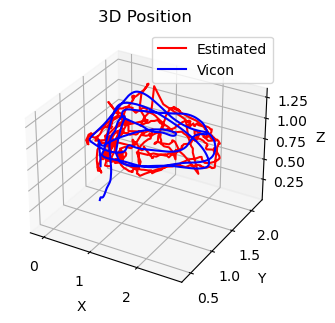

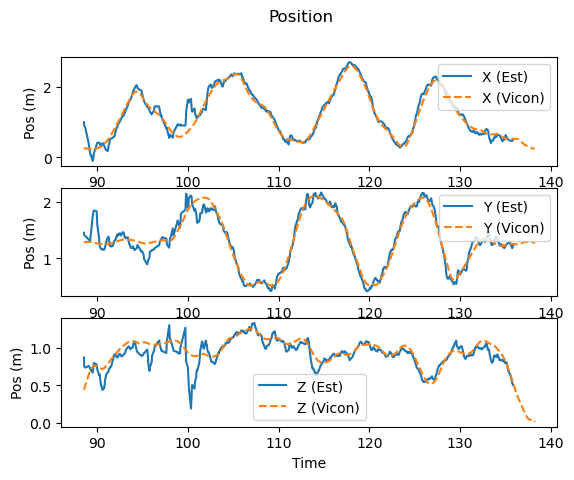

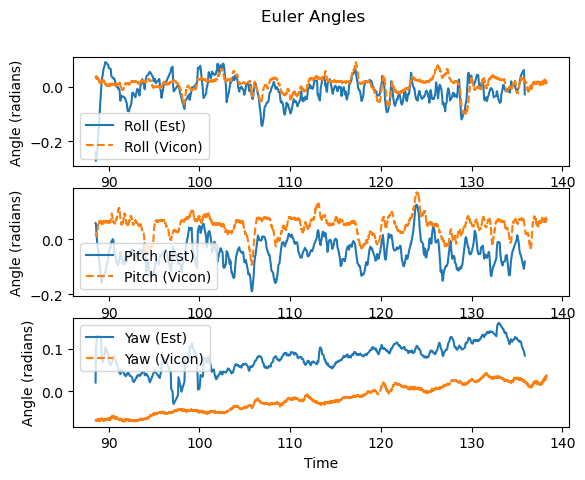

In [2]:
import particle_filter as pf
M = 1000
FILENAME = 'studentdata0.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset1

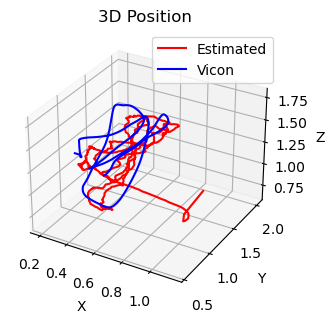

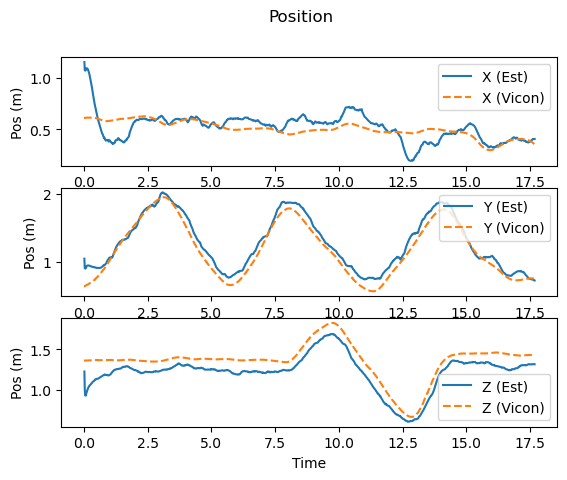

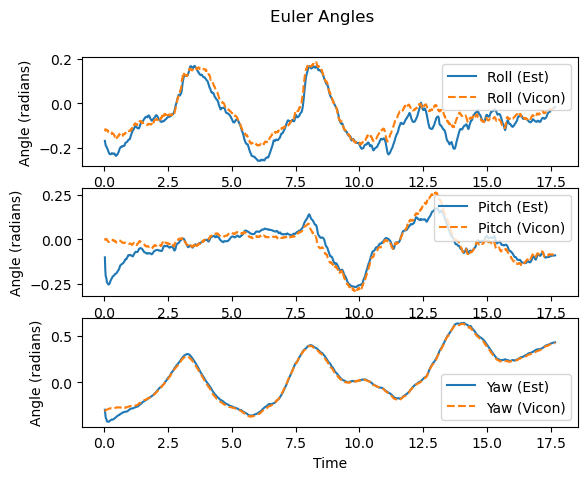

In [2]:
M = 1000
FILENAME = 'studentdata1.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset2

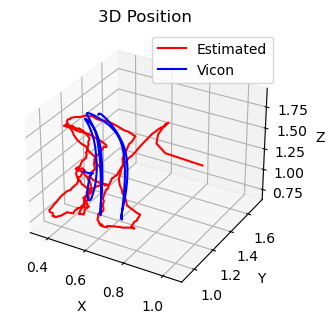

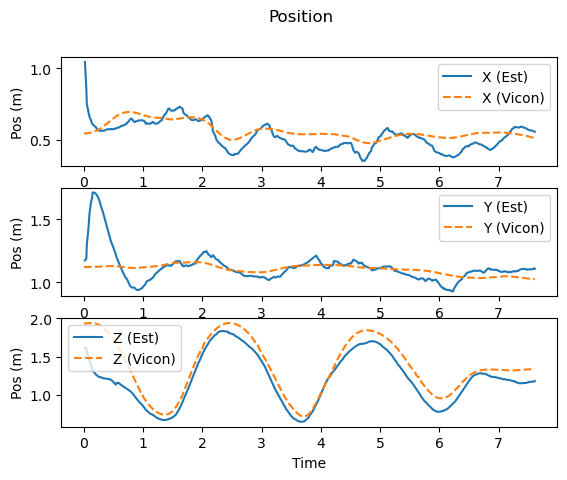

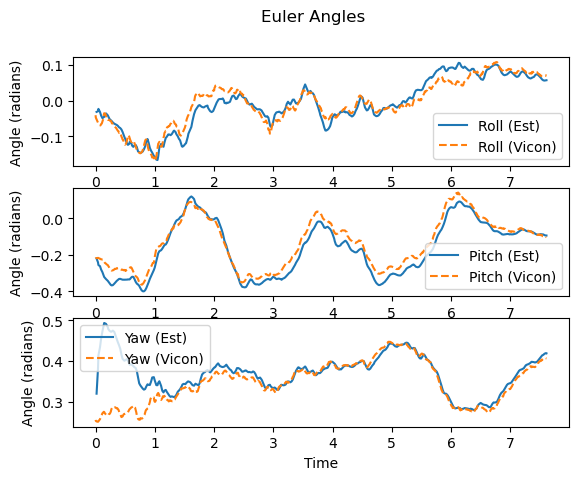

In [3]:
M = 1000
FILENAME = 'studentdata2.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset3

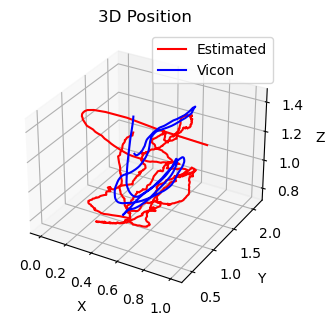

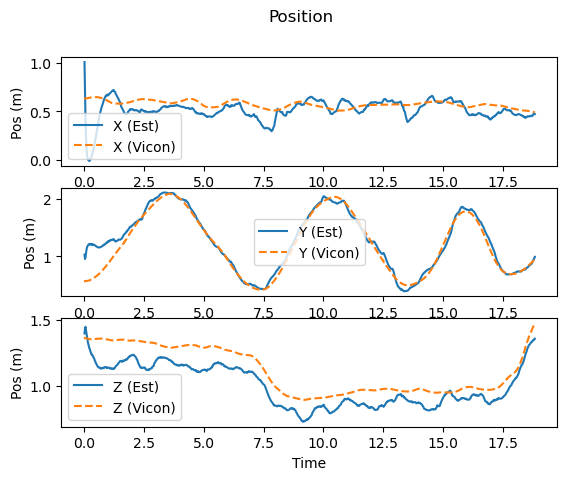

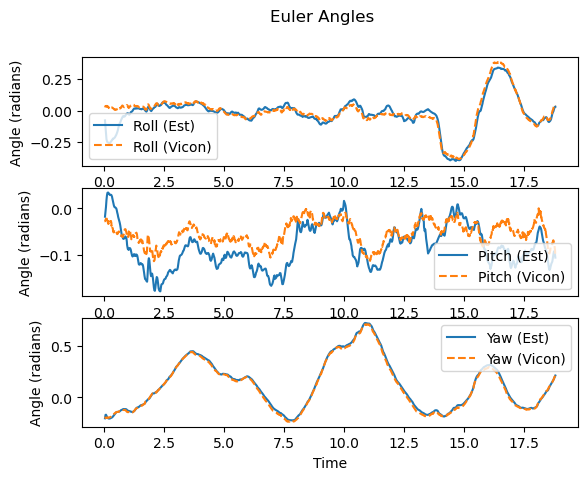

In [5]:
M = 1000
FILENAME = 'studentdata3.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset4

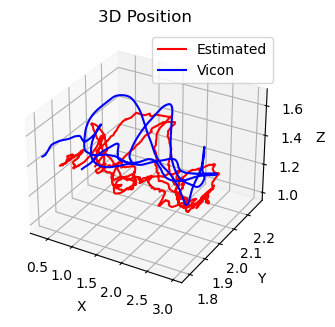

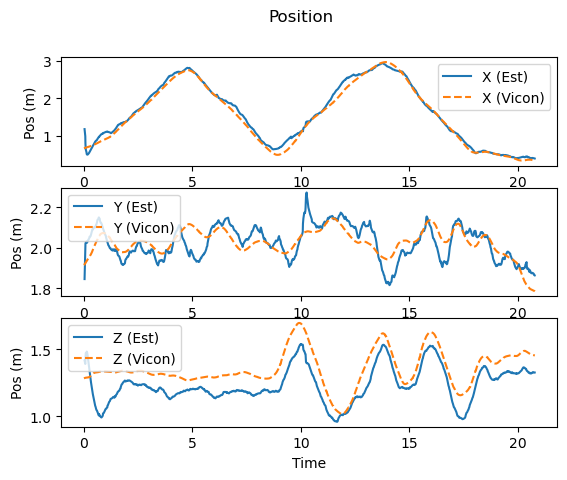

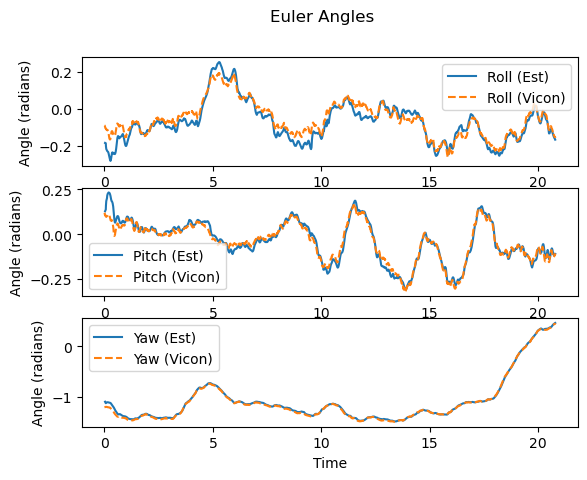

In [6]:
M = 1000
FILENAME = 'studentdata4.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset5

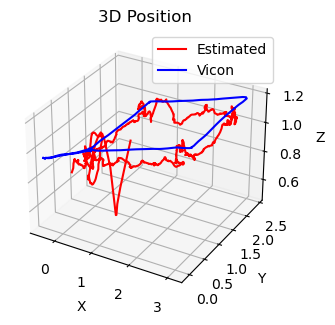

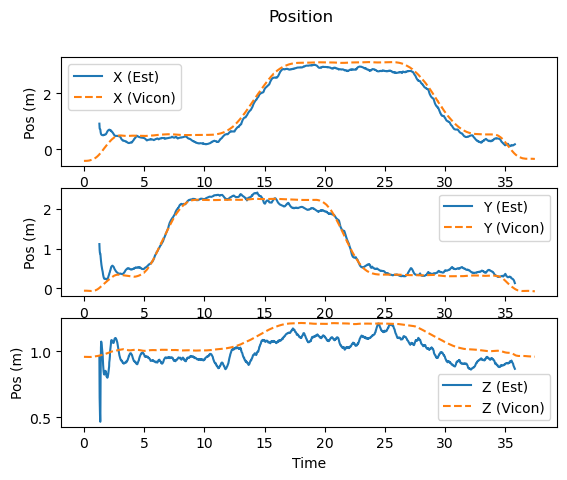

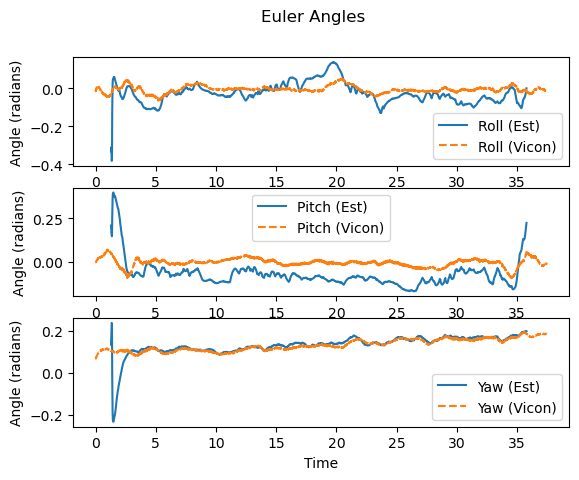

In [7]:
M = 1000
FILENAME = 'studentdata5.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset6

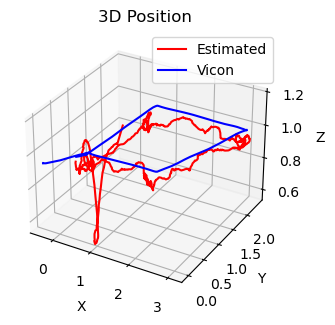

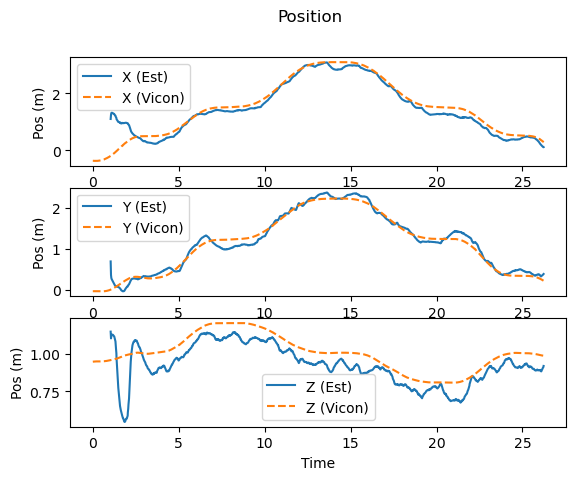

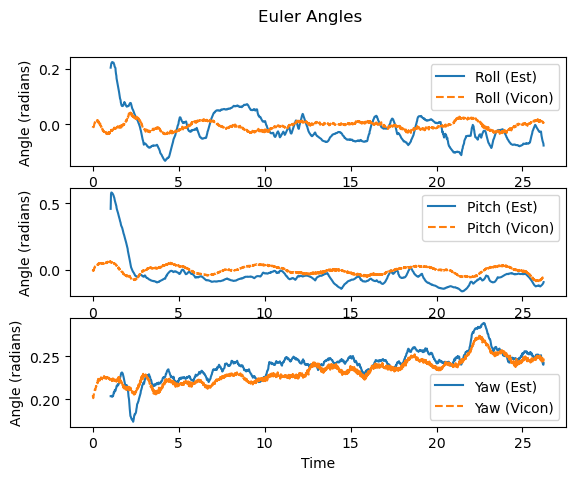

In [8]:
M = 1000
FILENAME = 'studentdata6.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

### Dataset7

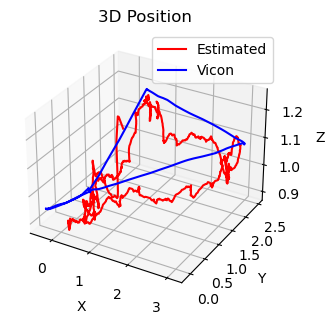

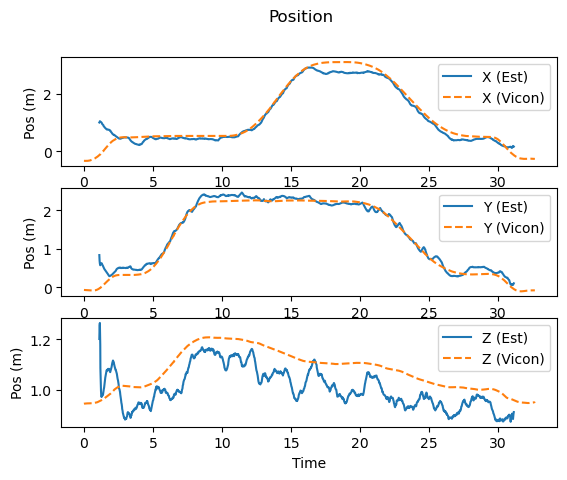

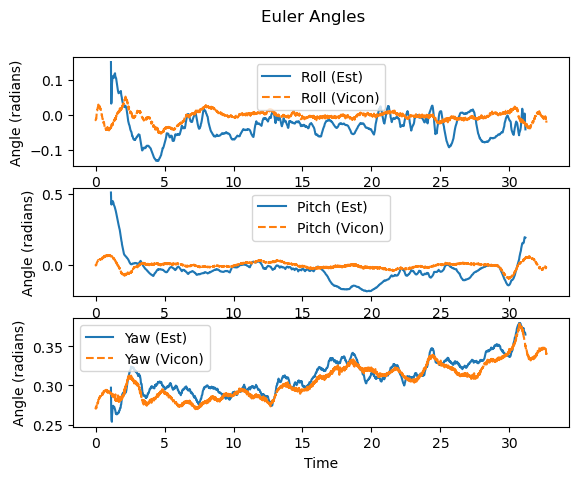

In [9]:
M = 1000
FILENAME = 'studentdata7.mat'
pf.ParticleFilter(M,FILENAME,plot_pose=True,rmse=False)

# Task 2: Error Analysis

The **calcRMSE()** function calculates the root mean squared error for each estimated pose obtained via weighted average, average and highest particle, and the ground truth vicon data. Since the timestamps for the estimated data and vicon data dont match, the estimated data is linearly interpolated to match the vicon timestamps. The estimated data is cleaned before interpolating as it may contain NaN values (whenever there are no camera pose measurements available, I assign NaN values to the estimated pose at that particular timestamp - this is the same approach I have used in the Non-Linear Kalman Filter project)

The calcRMSE() function then plots the RMSE values for the three different state estimation methods and returns the average RMSE value for each. Each dataset is evaluated for  and the results plotted and tabulated in the following sections.

## RMSE - Weighted Average, Average, Highest weight

The filter performace is evaluated on three different estimation methods.

1. Weighted Average: The final pose estimate is the weighted sum of all particles

2. Average: The final pose estimate is the mean of all particles, without the weights

3. Highest Weight: The particle with the highest weight is chosen as the final pose estimate

The RMSE plots for the the three different methods, each evaluated at a particle count of 1000, are shown below.

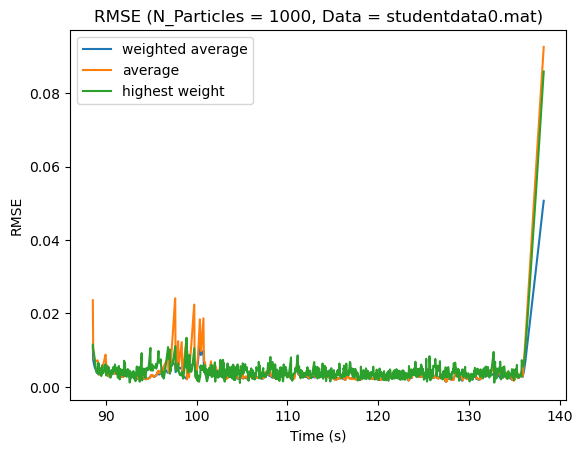

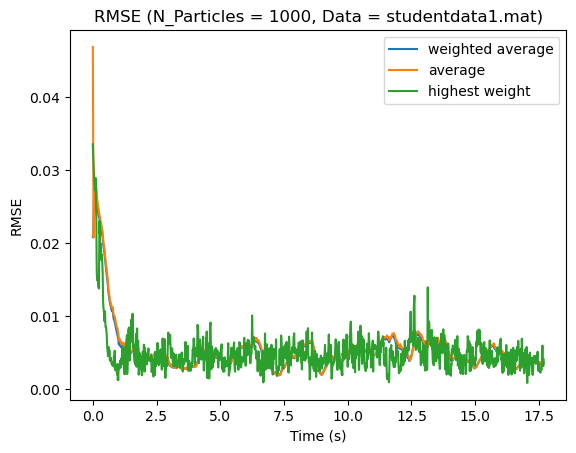

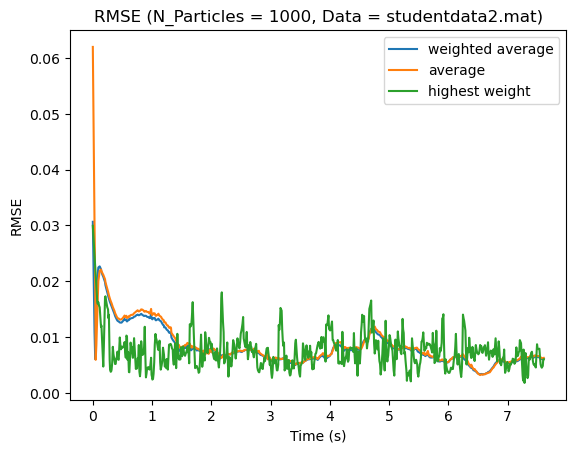

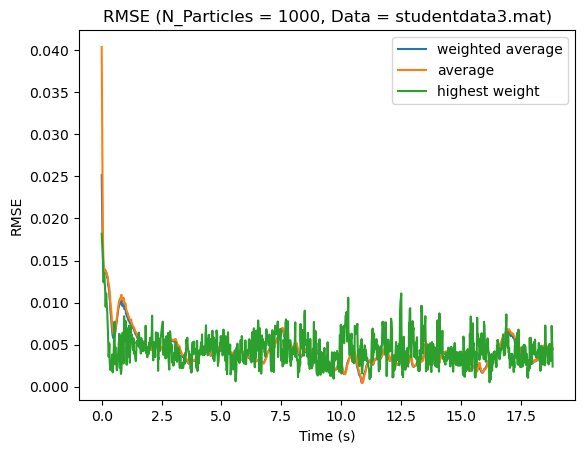

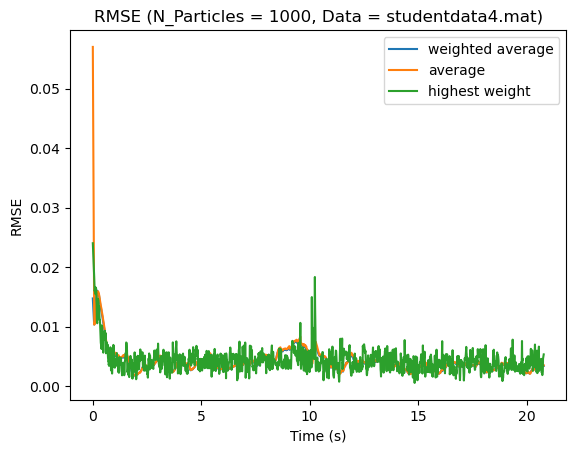

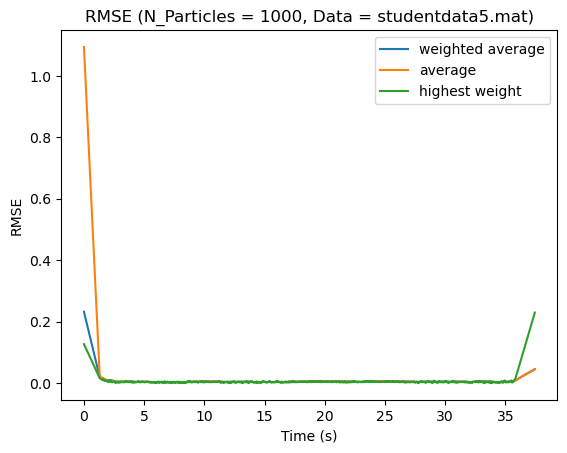

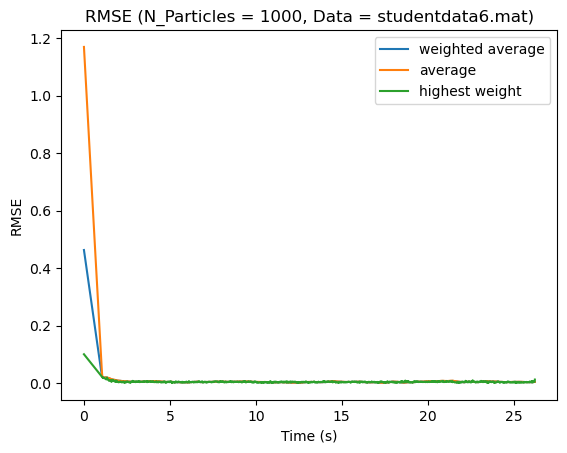

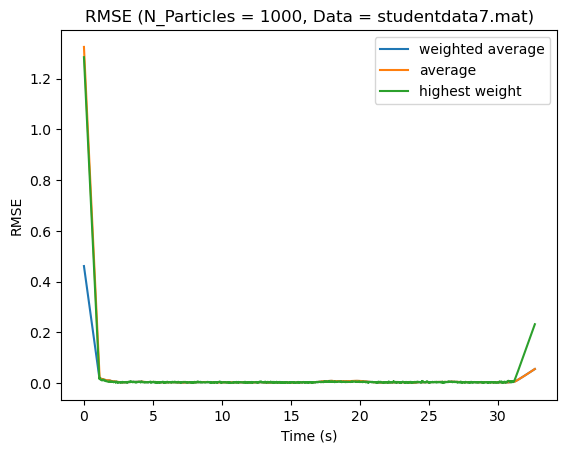

In [3]:
M = 1000
for i in range(8):
    FILENAME = 'studentdata{}.mat'.format(i)
    X1,X2,X3,time_est = pf.ParticleFilter(M,FILENAME,plot_pose=False,rmse=True)
    avgRMSE = pf.calcRMSE(X1,X2,X3,time_est,FILENAME,M,plot_rmse=True)

The average RMSE values for estimated pose with 1000 particles on each dataset, shown above, are summarized below:

| Dataset | Weighted Average | Average | Highest Weight |
|---------|------------------|---------|----------------|
| 0       | 0.00443          | 0.00615 | 0.00860        |
| 1       | 0.00527          | 0.00545 | 0.00497        |
| 2       | 0.00865          | 0.00903 | 0.00785        |
| 3       | 0.0039           | 0.00407 | 0.00413        |
| 4       | 0.0038           | 0.00398 | 0.00400        |
| 5       | 0.00912          | 0.02174 | 0.00929        |
| 6       | 0.01033          | 0.02581 | 0.00741        |
| 7       | 0.01357          | 0.02764 | 0.03642        |

It can be observed from the results that the Weighted average method outperforms the other two on 5 out of the 8 datasets, whereas the Highest Weight method has a lower avg RMSE value for 3 out of 8 datasets. 

*In conclusion, the weighted average estimate performs better than the other two.*


## RMSE - Particle Count

The filter performace is evaluated with different particle counts - 250,750,1000,2000,1000,2000,3000,4000,5000. This is done inorder to assess the effect of the particle count on the filter performace.

For each dataset, the average RMSE values for the three different sampling methods are calculated for each of the particle count and stored in a csv file.

In [10]:
import numpy as np
import particle_filter as pf
count = [250,750,1000,2000,1000,2000,3000,4000,5000]
rmse = np.full((8,9,3),np.nan)
for i in range(8):
    for j in range(len(count)):
        FILENAME = 'studentdata{}.mat'.format(i)
        M = count[j]
        X1,X2,X3,time_est = pf.ParticleFilter(M,FILENAME,plot_pose=False,rmse=True)
        avgRMSE = pf.calcRMSE(X1,X2,X3,time_est,FILENAME,M,plot_rmse=False)
        rmse[i,j] = avgRMSE
    # save rmse values in csv file
    csv_file = 'studentdata{}_RMSE.csv'.format(i)
    np.savetxt(csv_file,rmse[i,:,:].T,delimiter=',',fmt='%0.5f')

The RMSE data for each dataset is summarized in the tables below. From the below data we can conclude that increasing the particle count improves the filter performace. However, increasing the particle count also increases the computation time. Hence a tradeoff has to be made between the speed and accuracy of the filter.

1. **Dataset0**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00756 | 0.00487 | 0.00574 | 0.00467 | 0.00503 | 0.00477 | 0.00448 | 0.00419 | 0.00427 |
| Average      | 0.00950 | 0.00606 | 0.00798 | 0.00679 | 0.00738 | 0.00705 | 0.00583 | 0.00539 | 0.00554 |
| Highest Wt   | 0.00991 | 0.01152 | 0.01542 | 0.00774 | 0.00732 | 0.00691 | 0.00692 | 0.00648 | 0.00593 |


2. **Dataset1**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00545 | 0.00494 | 0.00512 | 0.00483 | 0.00491 | 0.00502 | 0.00485 | 0.00469 | 0.00467 |
| Average      | 0.00563 | 0.00512 | 0.00529 | 0.00499 | 0.00509 | 0.00519 | 0.00501 | 0.00487 | 0.00483 |
| Highest Wt   | 0.00555 | 0.00500 | 0.00488 | 0.00458 | 0.00473 | 0.00462 | 0.00440 | 0.00431 | 0.00439 |


3. **Dataset2**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00840 | 0.00852 | 0.00680 | 0.00778 | 0.00866 | 0.00731 | 0.00702 | 0.00635 | 0.00620 |
| Average      | 0.00862 | 0.00893 | 0.00712 | 0.00811 | 0.00903 | 0.00762 | 0.00730 | 0.00660 | 0.00648 |
| Highest Wt   | 0.00967 | 0.00847 | 0.00718 | 0.00791 | 0.00878 | 0.00733 | 0.00727 | 0.00705 | 0.00672 |


4. **Dataset3**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00487 | 0.00438 | 0.00425 | 0.00391 | 0.00387 | 0.00372 | 0.00421 | 0.00380 | 0.00387 |
| Average      | 0.00506 | 0.00454 | 0.00441 | 0.00407 | 0.00405 | 0.00387 | 0.00437 | 0.00395 | 0.00405 |
| Highest Wt   | 0.00513 | 0.00470 | 0.00437 | 0.00433 | 0.00407 | 0.00402 | 0.00424 | 0.00390 | 0.00388 |


5. **Dataset4**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00512 | 0.00406 | 0.00418 | 0.00371 | 0.00361 | 0.00392 | 0.00378 | 0.00360 | 0.00363 |
| Average      | 0.00532 | 0.00426 | 0.00436 | 0.00390 | 0.00378 | 0.00410 | 0.00395 | 0.00378 | 0.00381 |
| Highest Wt   | 0.00479 | 0.00422 | 0.00431 | 0.00376 | 0.00398 | 0.00386 | 0.00387 | 0.00377 | 0.00373 |


6. **Dataset5**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.01270 | 0.00855 | 0.01363 | 0.01162 | 0.01194 | 0.01340 | 0.01152 | 0.01327 | 0.01016 |
| Average      | 0.02508 | 0.02049 | 0.02311 | 0.02374 | 0.02619 | 0.02641 | 0.02430 | 0.02720 | 0.02550 |
| Highest Wt   | 0.02042 | 0.00843 | 0.02178 | 0.03955 | 0.01197 | 0.00692 | 0.00775 | 0.00584 | 0.01692 |


7. **Dataset6**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.00975 | 0.01041 | 0.01299 | 0.01331 | 0.01557 | 0.01089 | 0.01889 | 0.01381 | 0.00996 |
| Average      | 0.03263 | 0.02819 | 0.02937 | 0.02895 | 0.02922 | 0.02856 | 0.03219 | 0.03070 | 0.02864 |
| Highest Wt   | 0.00702 | 0.00880 | 0.00870 | 0.00744 | 0.00620 | 0.00630 | 0.00643 | 0.00645 | 0.00716 |


8. **Dataset7**

| Particle count | 250   | 750   | 1000  | 2000  | 1000  | 2000  | 3000  | 4000  | 5000  |
|--------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Weighted Avg | 0.01457 | 0.01356 | 0.01422 | 0.01287 | 0.01192 | 0.01143 | 0.01398 | 0.01295 | 0.01358 |
| Average      | 0.02425 | 0.03099 | 0.02403 | 0.02812 | 0.02552 | 0.02666 | 0.02409 | 0.02427 | 0.02517 |
| Highest Wt   | 0.03238 | 0.03154 | 0.03426 | 0.03434 | 0.02384 | 0.04643 | 0.02311 | 0.02278 | 0.00715 |

# Task 3: EKF VS PF

In this section, the performance of the particle filter is compared with the extended kalman filter. For a given dataset, the pose estimates are calculated using both the EKF and PF. The function **ekf_pf_RMSE()** then calculates and plots the RMSE data over time, and returns the average RMSE error of both filters. The plots comparing the RMSE values for oth EKF and PF over time are shown below.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


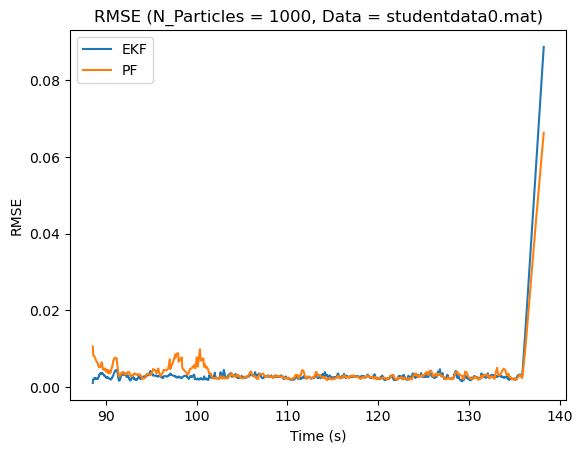

studentdata0.mat: [0.00468 0.00473]


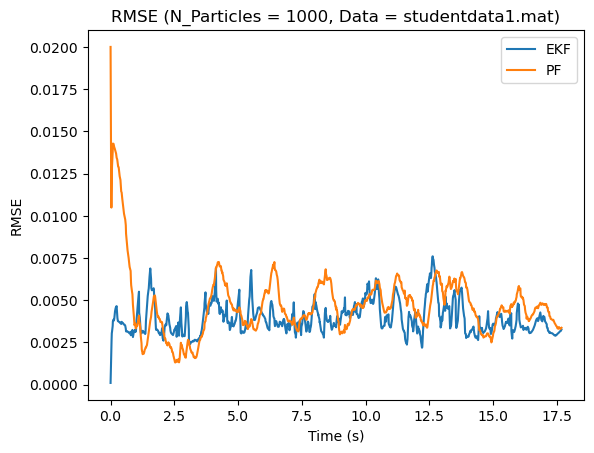

studentdata1.mat: [0.00393 0.00473]


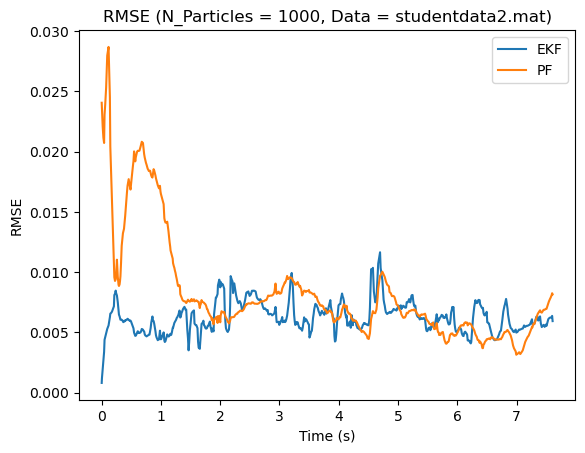

studentdata2.mat: [0.00627 0.00825]


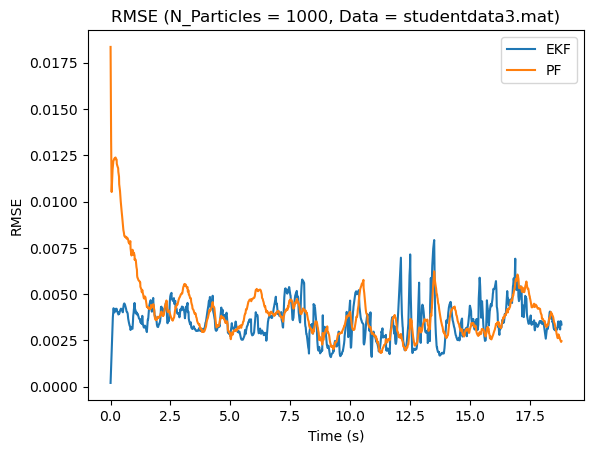

studentdata3.mat: [0.00356 0.00406]


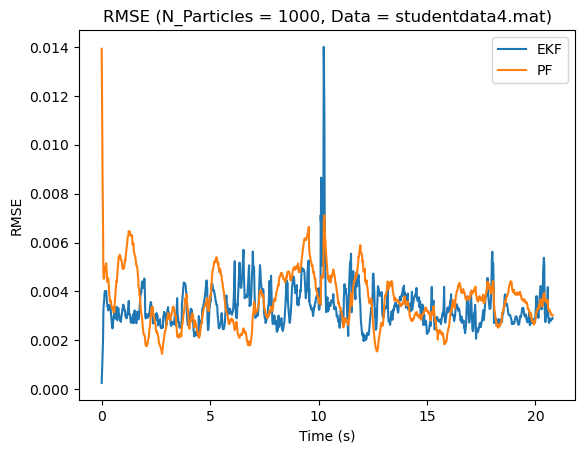

studentdata4.mat: [0.00333 0.00365]


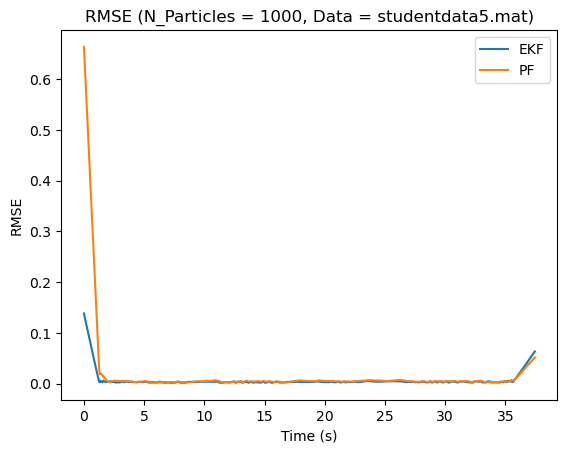

studentdata5.mat: [0.00686 0.0173 ]


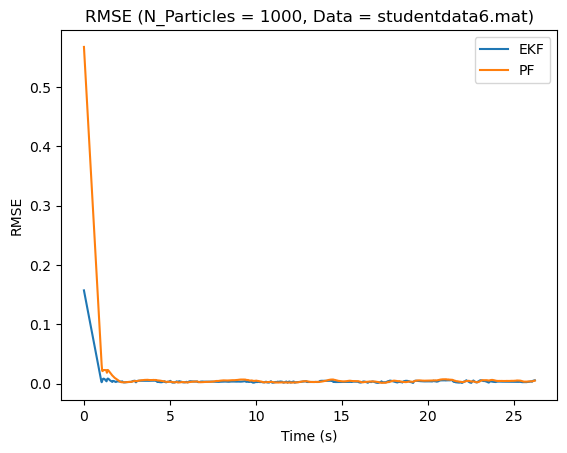

studentdata6.mat: [0.00633 0.01613]


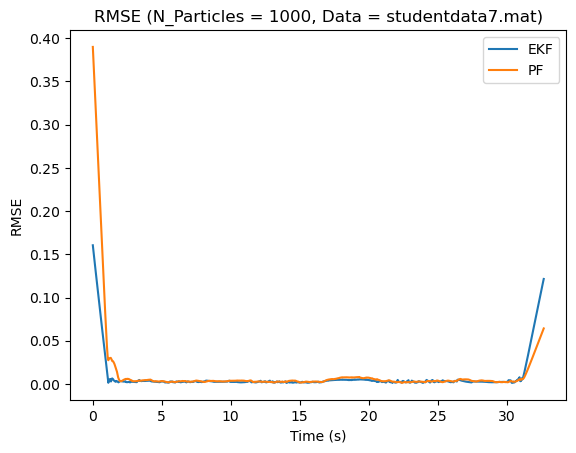

studentdata7.mat: [0.00837 0.01227]


In [1]:
from ekf import ExtendedKalmanFilter
import particle_filter as pf

for i in range(8):
    filename = 'studentdata{}.mat'.format(i)
    n_particles = 1000

    X_ekf,_ = ExtendedKalmanFilter(filename)
    X_pf,_,_,time_est = pf.ParticleFilter(n_particles,filename,plot_pose=False,rmse=True)

    avg_RMSE = pf.ekf_pf_RMSE(X_ekf,X_pf,time_est,filename,n_particles,plot_rmse=True)
    print('{}: {}'.format(filename,avg_RMSE))

The average RMSE values for the EKF and PF across various datasets are summarized below:

| Dataset | EKF | PF |
|---------|-----|----|
| 0 | 0.00468 | 0.00473 |
| 1 | 0.00393 | 0.00473 |
| 2 | 0.00627 | 0.00825 |
| 3 | 0.00356 | 0.00406 |
| 4 | 0.00333 | 0.00365 |
| 5 | 0.00686 | 0.0173 |
| 6 | 0.00633 | 0.01613 |
| 7 | 0.00837 | 0.01227 |


1. **Ease of implementation**

    The EKF was much easier to implement in code. Deriving the jacobian for the process model was simple - I used sympy to write the process model symbolically and used the inbuilt jacobian method to calculate the state matrix A. Once the process and observation model matrices were obtained, implementing the predict and update steps was pretty straighforward. Whereas the particle filter is slightly complicated to implement as you need to process thousands of particles, update individual weights using a gaussian pdf and then resample the particles.

    However, I noticed that it was easier to tune the Particle filter compared to the EKF. I think that the randomness of the particle sampling/re-sampling over state-space made the filter more robust to noise.

2. **Speed of Code**

    On average, the EKF takes 2 minutes and 30 seconds to process a single dataset, whereas the PF with 1000 particles takes just around 4 seconds on average to process a dataset. The PF is exponentially faster that the EKF. However, increasing the particle count slows down the particle filter and it takes just under 2 mins, on average, for PF with 5000 particles on each dataset, still rendering the PF faster than the EKF. 

3. **Accuracy**

    The EKF has slightly better accuracy compared to PF. However, it is to be noted that the RMSE was evaluated at a fixed particle count of 1000. In addition, the higher initial RMSE error of the PF leads to a higher average RMSE over time. Increasing the number of partciles can further help improve the accuracy of the particle filter.

**Conclusion**

The particle filter can reasonably represent a non-gaussian state belief and works well with a highly non-linear system whereas the EKF's shortcoming is primarily in its speed. The particle filter is exponentially faster than EKF with its accuracy being close enough to the EKF. So, it can be concluded that the Particle Filter is better choice over the extended kalman filter and is well suited for real-time applications.